# Loading Data & Processing

## importing pkgs

In [314]:
## importing pkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow
import sklearn
sns.set()



## Data loading

In [315]:
# ====== data loading ====== #
data_file = ('data_ec_il_inf.csv')

In [316]:
cp_data_mg = pd.read_csv('data/data_ec_il_inf.csv')
cp_data_mg

,Temp,np_con,C2mim
0,-10,0.0,2.3334
1,-5,0.0,3.0615
2,0,0.0,3.9070
3,5,0.0,4.8433
4,10,0.0,5.9270
...,...,...,...
109,60,1.0,38.0310
110,65,1.0,41.1801
111,70,1.0,43.6329
112,75,1.0,47.0746


# Feature Engineering

In [317]:
cp_data_mg = pd.read_csv('data/data_ec_il_inf.csv')
cp_data_mg

,Temp,np_con,C2mim
0,-10,0.0,2.3334
1,-5,0.0,3.0615
2,0,0.0,3.9070
3,5,0.0,4.8433
4,10,0.0,5.9270
...,...,...,...
109,60,1.0,38.0310
110,65,1.0,41.1801
111,70,1.0,43.6329
112,75,1.0,47.0746


In [318]:
cp_data_mg = pd.read_csv('data/data_ec_il_inf.csv')
cp_data_mg

,Temp,np_con,C2mim
0,-10,0.0,2.3334
1,-5,0.0,3.0615
2,0,0.0,3.9070
3,5,0.0,4.8433
4,10,0.0,5.9270
...,...,...,...
109,60,1.0,38.0310
110,65,1.0,41.1801
111,70,1.0,43.6329
112,75,1.0,47.0746


In [319]:
cp_data_mg.columns = ['T','wt','ec[S/m]']
cp_data_mg

,T,wt,ec[S/m]
0,-10,0.0,2.3334
1,-5,0.0,3.0615
2,0,0.0,3.9070
3,5,0.0,4.8433
4,10,0.0,5.9270
...,...,...,...
109,60,1.0,38.0310
110,65,1.0,41.1801
111,70,1.0,43.6329
112,75,1.0,47.0746


In [320]:
# converting temp to Kelvin
cp_data_mg['Temp[K]'] = cp_data_mg['T'] + 273.15
cp_data_mg.drop(['T'],axis=1)

,wt,ec[S/m],Temp[K]
0,0.0,2.3334,263.15
1,0.0,3.0615,268.15
2,0.0,3.9070,273.15
3,0.0,4.8433,278.15
4,0.0,5.9270,283.15
...,...,...,...
109,1.0,38.0310,333.15
110,1.0,41.1801,338.15
111,1.0,43.6329,343.15
112,1.0,47.0746,348.15


## Cean Data Checkpoin

In [321]:
cp_clean_data = cp_data_mg.copy() #DATA CHECKPOINT!

In [322]:
corr_matrix = cp_clean_data.corr()
corr_matrix['ec[S/m]'].sort_values(ascending=False)


ec[S/m]    1.000000
Temp[K]    0.848573
T          0.848573
wt         0.478533
Name: ec[S/m], dtype: float64

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_7754/167342473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['ec[S/m]'])


<AxesSubplot: xlabel='ec[S/m]', ylabel='Density'>

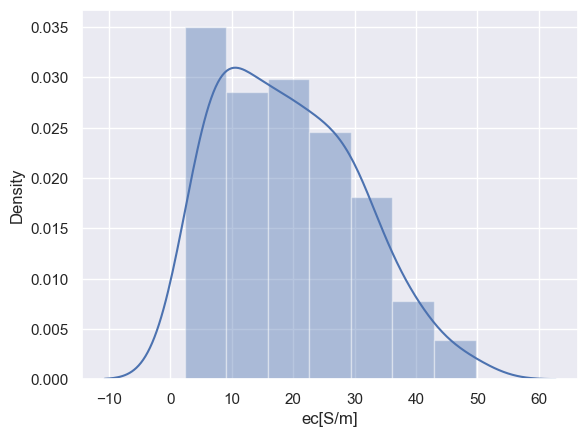

In [323]:
sns.distplot(cp_clean_data['ec[S/m]'])

##Checking the assumptions!

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_7754/3936952428.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="ec[S/m]", x="Temp[K]", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
/Users/nirmal/Documents/data_science/electric_conductivity_INF/Electrical_Conductivity_INF_ANN/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


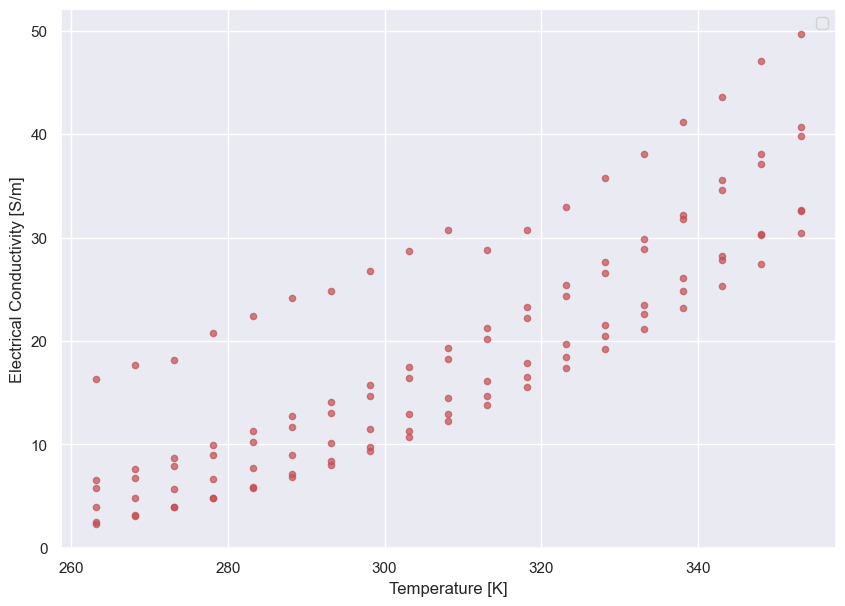

In [324]:
ax1 = cp_clean_data.plot(kind="scatter", y="ec[S/m]", x="Temp[K]", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Temperature [K]")
ax1.set_ylabel("Electrical Conductivity [S/m]")
plt.legend()


# Train Test & Target Data

In [325]:
# target data
target = np.round(cp_clean_data['ec[S/m]'],2)
ec_data = np.round(cp_clean_data[['Temp[K]', 'wt']],2)


In [326]:
from sklearn.model_selection import train_test_split 
ec_train, ec_test, target_train, target_test = train_test_split(ec_data, target, test_size=0.1, random_state= 42)

## Data Pipeline for standardlisation




In [327]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('std_scalar', StandardScaler())
])


In [328]:
ec_data_scaled = num_pipline.fit_transform(ec_train)

In [329]:
ec_data_scaled

array([[-0.37010425,  0.85072701],
       [ 1.4190253 ,  1.54603274],
       [ 1.59793825, -1.23519018],
       [-1.62249493, -1.23519018],
       [ 1.06119939, -0.53988445],
       [-0.37010425, -0.95706789],
       [-0.72793016,  0.85072701],
       [ 1.06119939,  0.15542128],
       [-0.19119129,  1.54603274],
       [ 1.06119939,  0.85072701],
       [ 0.52446052, -1.23519018],
       [ 0.52446052, -0.95706789],
       [ 0.16663461, -0.53988445],
       [ 1.24011234,  1.54603274],
       [ 0.70337348,  1.54603274],
       [-1.08575607, -0.95706789],
       [-0.5490172 ,  0.15542128],
       [ 0.52446052,  1.54603274],
       [-1.26466902,  0.85072701],
       [ 1.06119939, -1.23519018],
       [ 0.34554757, -0.95706789],
       [-0.01227834,  1.54603274],
       [-0.01227834, -1.23519018],
       [ 0.88228643, -0.95706789],
       [-0.72793016, -0.53988445],
       [-0.19119129, -0.53988445],
       [-0.01227834, -0.95706789],
       [-0.90684311,  0.15542128],
       [-0.72793016,

# ML Model Check PolyReg

In [330]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(ec_data_scaled,target_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [331]:
from sklearn.metrics import mean_squared_error
poly_reg_predict = polyreg.predict(ec_data_scaled)
polyreg_mse = mean_squared_error(target_train, poly_reg_predict)
polyreg_rmse = np.sqrt(polyreg_mse)
polyreg_rmse


1.4637202903075806

In [332]:
from zmq.constants import SocketOption
from sklearn.model_selection import cross_val_score

plyscores = cross_val_score(polyreg, ec_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
polyreg_rmse_scores = np.sqrt(-plyscores)
polyreg_rmse_scores

array([1.48266668, 1.64759466, 1.42622263, 1.7269339 , 1.40749237])

## ML Model Chek DTR

In [333]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(ec_data_scaled, target_train)

DecisionTreeRegressor()

In [334]:
from sklearn.metrics import mean_squared_error

err_prediction = tree_reg.predict(ec_data_scaled)
tree_mse = mean_squared_error(target_train, err_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross validation

In [335]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, ec_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([1.97576989, 2.12784935, 1.43811509, 1.95511892, 1.55091263])

In [336]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Std Dev:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1.97576989 2.12784935 1.43811509 1.95511892 1.55091263]
Mean: 1.8095531769788156
Std Dev: 0.26645488257448086


## ML model check RFR

In [337]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_depth=10)
forest_reg.fit(ec_data_scaled, target_train)

RandomForestRegressor(max_depth=10)

In [338]:
from sklearn.metrics import mean_squared_error

err_prediction = forest_reg.predict(ec_data_scaled)
ftree_mse = mean_squared_error(target_train, err_prediction)
ftree_rmse = np.sqrt(ftree_mse)
ftree_rmse

0.48126438109401076

## Cross Validation 

In [339]:
from zmq.constants import SocketOption
from sklearn.model_selection import cross_val_score

fscores = cross_val_score(forest_reg, ec_data_scaled, target_train,
                        scoring="neg_mean_squared_error", cv=5)
ftree_rmse_scores = np.sqrt(-fscores)
ftree_rmse_scores

array([1.64577254, 1.79838177, 0.81399592, 1.71454456, 1.34716866])

In [340]:
def display_scores(fscores):
  print("Scores:", fscores)
  print("Mean:", fscores.mean())
  print("Std Dev:", fscores.std())

display_scores(ftree_rmse_scores)

Scores: [1.64577254 1.79838177 0.81399592 1.71454456 1.34716866]
Mean: 1.4639726909089823
Std Dev: 0.35882582351375103


#Test Data Check

### Check PolyReg

In [341]:
ec_test_scaled = num_pipline.transform(ec_test) # data standarlised

In [342]:
polyreg_test_predict = polyreg.predict(ec_test_scaled) # test prediction

poly_rmse = mean_squared_error(target_test, polyreg_test_predict) # error check
poly_rmse = np.sqrt(poly_rmse)
poly_rmse

1.3091349487696495

### check DTR

In [343]:
dtr_test_predict = tree_reg.predict(ec_test_scaled) # tests prediction
 
tree_mse = mean_squared_error(target_test, dtr_test_predict) # error check
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.6487975416446163

### Check RFR

In [344]:
rfr_test_predict = forest_reg.predict(ec_test_scaled)

ftree_mse = mean_squared_error(target_test, rfr_test_predict)
ftree_rmse = np.sqrt(ftree_mse)
ftree_rmse

0.832556281380821

In [345]:
prediction = pd.DataFrame(rfr_test_predict)
prediction.index = target_test.index
target_test = pd.DataFrame(target_test)

acu_pred = (target_test.iloc[:,0] / prediction.iloc[:,0]) * 100
acu_pred
result = pd.concat([target_test, prediction, acu_pred], axis=1, ignore_index=True)

result.columns = ['Targets', 'Predictions', 'Pred-Accu-(%)']
result

,Targets,Predictions,Pred-Accu-(%)
80,11.29,10.5408,107.107620
4,5.93,5.8012,102.220230
40,7.86,7.5923,103.525941
69,19.66,19.3109,101.807787
10,14.69,14.5149,101.206347
45,14.67,14.0344,104.528872
70,21.52,21.1727,101.640320
66,14.50,13.8567,104.642520
47,18.23,18.3188,99.515252
11,16.53,16.4713,100.356377


Text(0.5, 0, 'Targets (red) & Predictions (blue)')

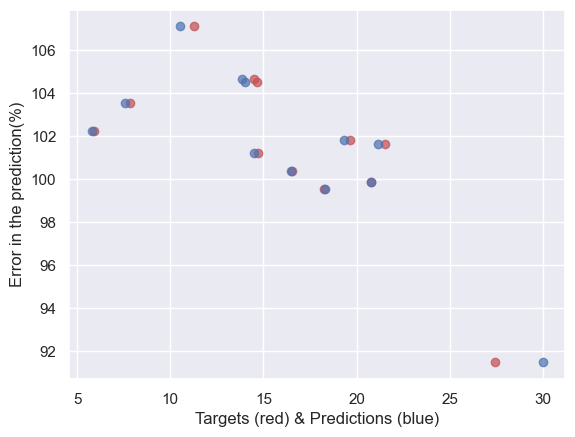

In [346]:
import matplotlib.pyplot as plt
plt.scatter(result['Targets'], result['Pred-Accu-(%)'], alpha=0.7, color='r')
plt.scatter(result['Predictions'], result['Pred-Accu-(%)'],alpha=0.7, color='b')
plt.ylabel('Error in the prediction(%)')
plt.xlabel('Targets (red) & Predictions (blue)')

Text(0.5, 0, 'Targets')

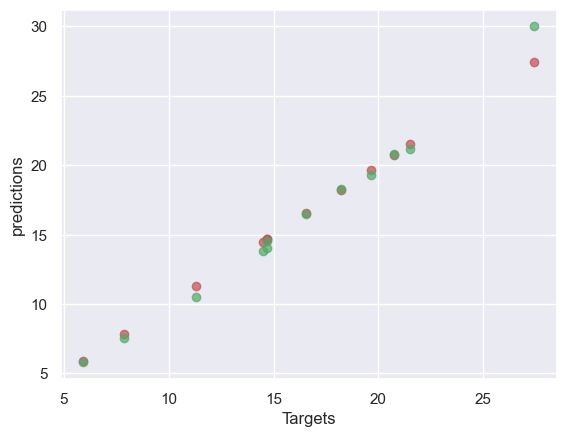

In [347]:
plt.scatter(result['Targets'], result['Targets'], alpha=0.7, color='r')
plt.scatter(result['Targets'], result['Predictions'], alpha=0.7, color='g')

plt.ylabel('predictions')
plt.xlabel('Targets')

In [348]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(target_test, prediction)
np.round(r2_score_test,4)

0.9791

In [349]:
# estimation of adjusted R2 score
n = np.size(target_test)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
np.round(adj_r2_score,4)

0.9713

In [350]:
mean_pred = acu_pred.mean()
std_pred = acu_pred.std()
uncertainty_model = std_pred
print("Uncertainty of the ANN model:", np.round(uncertainty_model,2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model,2), '[%]')

Uncertainty of the ANN model: 3.86 [%]
Average test prediction precision 96.14 [%]


## Model Deployment

In [351]:
import joblib

In [352]:
joblib.dump(tree_reg,'ec_pred_rfr.pkl') # DTR model pkl

['ec_pred_rfr.pkl']

In [353]:
joblib.dump(num_pipline,'scaler_ml.pkl') #scaler for standarlisation model pkl

['scaler_ml.pkl']